In this notebook I use `Matplotlib.pyplot` to create simple yet powerful visualizations of PyBites Twitter activity, our blog's tag usage and our website traffic. Lastly I use Google trends to see popularity of various social media.

In [1]:
# import libs 
from collections import Counter, OrderedDict
import csv
import datetime
import itertools
import operator
import random
import re 

import feedparser
from matplotlib import pyplot as plt
import numpy as np
import requests

# to show plots inside our Jupyter notebook
%matplotlib inline

## 1. Simple Line Chart: how often do we tweet per day? 

First, gather the last 200 tweets csv using the challenge 04 codes and classnotes. 

In [2]:
def get_csv(url):
    with requests.Session() as s:
        download = s.get(url)
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        return list(cr)[1:]
        
def get_dates(csv):
    for row in reversed(csv):
        yield row[1].split()[0]
        
BASE_URL = 'http://projects.bobbelderbos.com/matplotlib/'

In [48]:
values[1]

0      828891098332356613
1      828891064920571905
2      828533803526324225
3      828528676123783168
4      828166290330120192
              ...        
195    816539053097185280
196    816382171619454976
197    816381754319589376
198    816369304702685184
199    816207547589763072
Name: id_str, Length: 200, dtype: int64

ValueError: values must be a 1D array

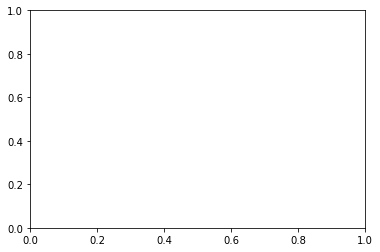

In [49]:
import pandas as pd
pybites_csv = pd.read_csv('{}pybites.csv'.format(BASE_URL))
# c = Counter(list(get_dates(pybites_csv)))
# c_sorted = sorted(c.items(), key=operator.itemgetter(0))
# labels, values = zip(*c_sorted); index = np.arange(len(labels))
values = sorted(pybites_csv.items(), key=operator.itemgetter(0))[1]
indexes = pd.array([i for i in range(pybites_csv.shape[0])])
width = 1

plt.plot(indexes, values[1])
#plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)

fig = plt.gcf()
fig.set_size_inches(15,15)

plt.title('PyBites Twitter activity (last 200 tweets)')
plt.show() 
# plt.savefig('file.png') to save to file

## 2. Bar chart distribution of average number of tags 

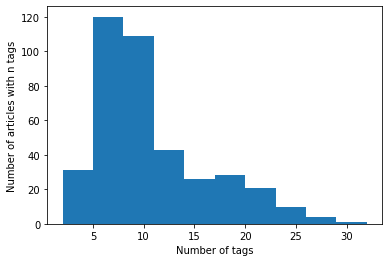

In [50]:
our_feed = feedparser.parse('http://pybit.es/feeds/all.rss.xml')

tag_count = [len(entry['tags']) for entry in our_feed['entries']]
plt.hist(tag_count)
plt.xlabel("Number of tags")
plt.ylabel("Number of articles with n tags")
plt.show()

## 3. Scatterplot of numbers of shares vs. number of visits 

In [51]:
top_shares_csv = get_csv('{}TopSharingContent.csv'.format(BASE_URL))
top_visit_csv = get_csv('{}TopVisitContent.csv'.format(BASE_URL))
visits = dict((row[0], row[3]) for row in top_visit_csv)

# take articles with at least one share
pages, shares = zip(*dict((row[0], row[3]) for row in top_shares_csv if int(row[3]) > 1).items())
visits = [visits.get(page, 0) for page in pages]

url = re.compile(r'.*pybit.es(/.*?.html).*').sub
for page, share, visit in zip(pages, shares, visits):
    plt.annotate(url(r'\1', page), xy=(share, visit),
                xytext=(5, -5), 
                textcoords='offset points', rotation=45)
plt.title('PyBites shares vs visits')
plt.xlabel('# of shares')
plt.ylabel('# of visits')

fig = plt.gcf()
fig.set_size_inches(15, 15)

plt.scatter(shares, visits)
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)

## 4. Multi-line plot of social media interest rates (Google Trends)
**Google Trends** lets you measure 'Interest over time':

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

Twitter example here. In the next cell I download this for a couple of big social media and aggregate the results, plotting each service.

In [52]:
SOCIAL_MEDIA = 'facebook instagram linkedin pinterest reddit skype twitter whatsapp'.split()
THIS_YEAR = datetime.datetime.now().year

def get_stats(soc_media):
    url = '{}{}.csv'.format(BASE_URL, soc_media)
    data = dict(get_csv(url)[2:])
    for year, days in itertools.groupby(sorted(data), lambda date: date[:4]):
        if int(year) < THIS_YEAR:
            days = list(days)
            yield year, sum(int(data.get(d, 0)) for d in days) / len(days)

soc_med_stats = {}
for sm in SOCIAL_MEDIA:
    res = OrderedDict(list(get_stats(sm)))
    soc_med_stats[sm] = res

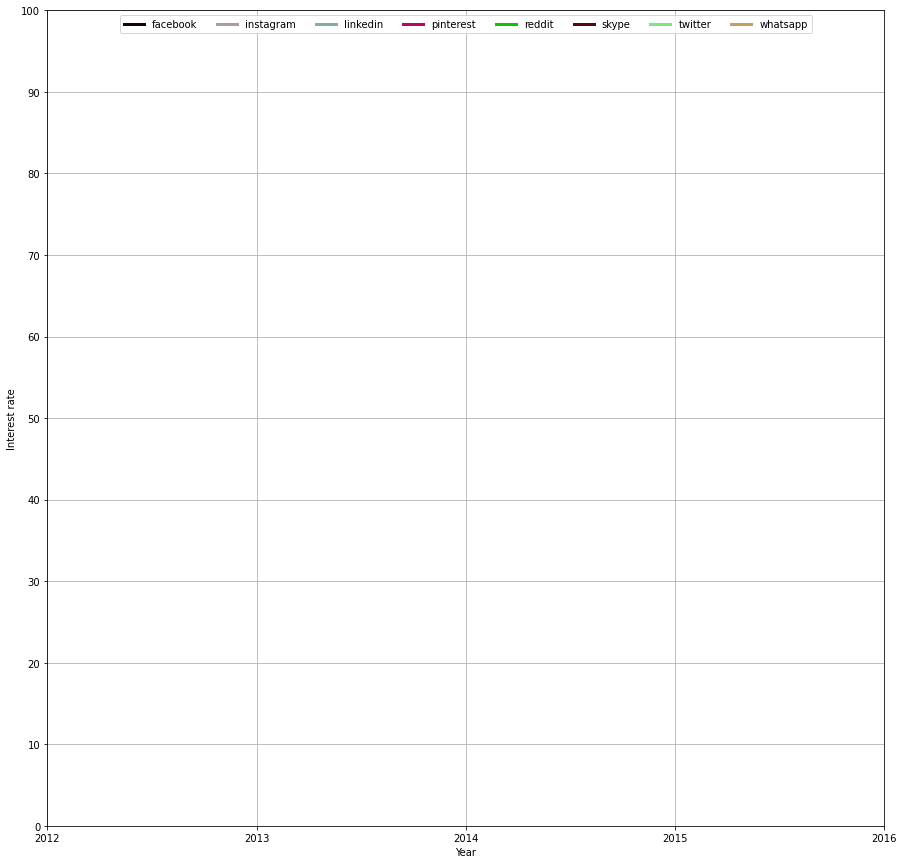

In [53]:
def get_random_color():
    """http://stackoverflow.com/questions/13998901/generating-a-random-hex-color-in-python"""
    r = lambda: random.randint(0,255)
    yield '#%02X%02X%02X' % (r(),r(),r())

years = list(soc_med_stats[SOCIAL_MEDIA[0]].keys())

plt.figure()
fig = plt.gcf()
fig.set_size_inches(15, 15)
for sm, stats in soc_med_stats.items():
    plt.plot(list(stats.keys()), list(stats.values()), label=sm, lw=3, color=next(get_random_color()))
plt.xlim(2012, 2016)
plt.ylim(0, 100)
plt.xticks(range(2012, 2017), ['2012', '2013', '2014', '2015', '2016'])
plt.yticks(range(0,101,10))
plt.xlabel('Year')
plt.ylabel('Interest rate')
plt.legend(loc='upper center', ncol=len(soc_med_stats))
plt.grid(True)
plt.show()

Amazing: clearly interest in Instagram, Reddit and Whatsapp grew last couple of years (again this is just one source: Google Trends)